In [1]:
import pandas as pd 
import numpy as np 
import matplotlib as plt

In [2]:
data = pd.read_csv('Electricity Consumption.csv')

In [3]:
data

,DATE,Electricty_Consumption_in_TW
0,1/1/1973,35.9728
1,2/1/1973,36.1334
2,3/1/1973,35.0625
3,4/1/1973,33.8416
4,5/1/1973,33.5107
...,...,...
556,5/1/2019,97.5860
557,6/1/2019,110.8580
558,7/1/2019,122.1014
559,8/1/2019,121.7765


In [4]:
data.columns = ['date', 'electricity']

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         561 non-null    object 
 1   electricity  561 non-null    float64
dtypes: float64(1), object(1)
memory usage: 8.9+ KB


In [6]:
data['date'] = pd.to_datetime(data.date, format='%m/%d/%Y')

In [7]:
data.set_index(data.date, inplace=True) # setting the index to date time format

In [8]:
data


,date,electricity
date,,
1973-01-01,1973-01-01,35.9728
1973-02-01,1973-02-01,36.1334
1973-03-01,1973-03-01,35.0625
1973-04-01,1973-04-01,33.8416
1973-05-01,1973-05-01,33.5107
...,...,...
2019-05-01,2019-05-01,97.5860
2019-06-01,2019-06-01,110.8580
2019-07-01,2019-07-01,122.1014


In [9]:
# adding two new columns year and month 
data['year'] = data.date.dt.year
data['month'] = data.date.dt.month


In [11]:
data

,date,electricity,year,month
date,,,,
1973-01-01,1973-01-01,35.9728,1973,1
1973-02-01,1973-02-01,36.1334,1973,2
1973-03-01,1973-03-01,35.0625,1973,3
1973-04-01,1973-04-01,33.8416,1973,4
1973-05-01,1973-05-01,33.5107,1973,5
...,...,...,...,...
2019-05-01,2019-05-01,97.5860,2019,5
2019-06-01,2019-06-01,110.8580,2019,6
2019-07-01,2019-07-01,122.1014,2019,7


In [58]:
ts=data[['date','electricity']]

In [60]:
ts.set_index('date',inplace=True)

In [61]:
# this will give the time series 
ts

,electricity
date,
1973-01-01,35.9728
1973-02-01,36.1334
1973-03-01,35.0625
1973-04-01,33.8416
1973-05-01,33.5107
...,...
2019-05-01,97.5860
2019-06-01,110.8580
2019-07-01,122.1014


<AxesSubplot:xlabel='date'>

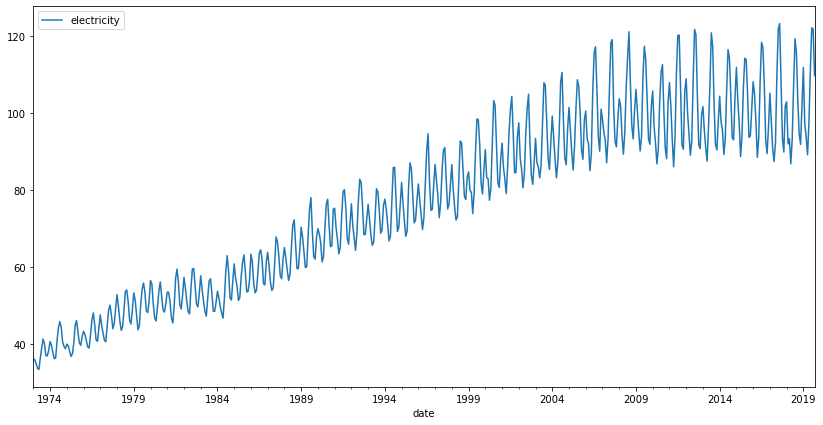

In [62]:
ts.plot(figsize = (14,7))

In [14]:
pd.pivot_table(data = data, index = 'year', columns = 'month', values = 'electricity')
# we can observer that in month 7 and 8 we value of sales is high in every year 

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
1973,35.9728,36.1334,35.0625,33.8416,33.5107,36.4823,39.1412,41.4137,40.1639,37.1133,37.0248,38.4341
1974,40.7455,39.8340,37.9408,36.3004,36.5293,40.8899,44.3563,45.9240,44.4555,40.6417,39.4901,38.9068
1975,40.0956,39.6944,38.3040,36.8939,37.5668,40.3832,44.9671,46.1853,43.3001,40.3836,39.8092,42.0597
1976,43.4099,42.5826,40.9244,39.3533,39.0766,42.4851,46.3693,48.1945,45.1688,41.1880,40.8431,44.1468
1977,47.6892,44.8505,42.8557,41.0177,40.7201,45.0610,48.9685,50.1898,47.5982,44.0684,45.4267,49.3447
1978,52.9153,49.9488,46.1749,43.6652,44.5402,48.9480,53.8292,54.1182,50.9980,46.3711,45.3267,49.0027
1979,53.3617,51.6279,47.8264,43.7935,44.8591,50.3292,54.3579,55.9197,53.5776,48.7261,48.2585,51.3008
1980,56.5838,55.6802,50.4428,46.8693,46.0886,49.7595,53.8273,56.2272,52.5737,48.8947,48.4081,50.6659
1981,53.5867,53.5461,51.0708,46.9172,45.5795,50.0235,57.1384,59.5376,56.1935,50.3249,49.2234,52.8176


<AxesSubplot:xlabel='month'>

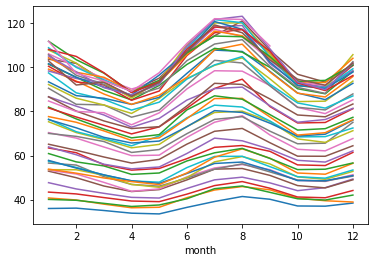

In [15]:
pd.pivot_table(data = data, index = 'month', columns = 'year', values = 'electricity').plot(legend=False)

<AxesSubplot:xlabel='year'>

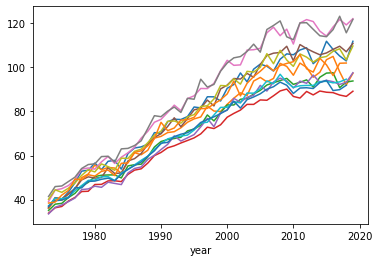

In [16]:
pd.pivot_table(data = data, index = 'year', columns = 'month', values = 'electricity').plot(legend=False)

In [12]:
# Decomposition to understand if there is a irregularity etc 
from statsmodels.tsa.seasonal import seasonal_decompose

In [63]:
decom = seasonal_decompose(ts, model='multiplicative')
#decom = seasonal_decompose(ts, model='additive')

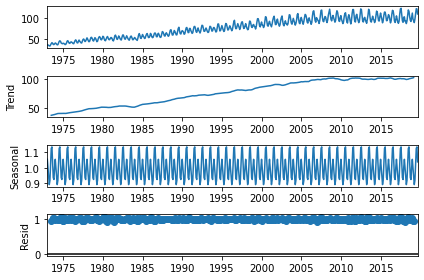

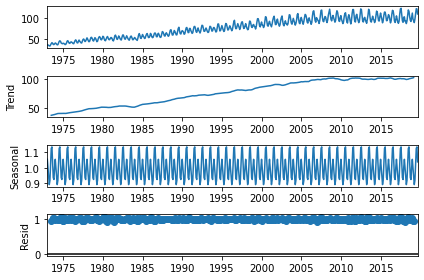

In [64]:
decom.plot()

<AxesSubplot:title={'center':'trend'}, xlabel='date'>

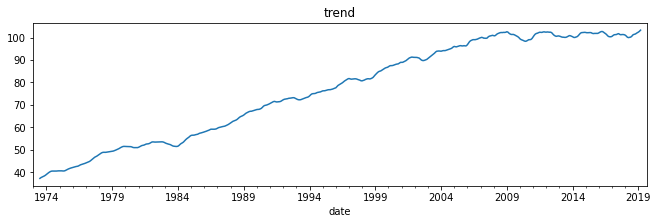

In [65]:
decom.trend.plot(title='trend',figsize=(11,3))

<AxesSubplot:title={'center':'residual'}, xlabel='date'>

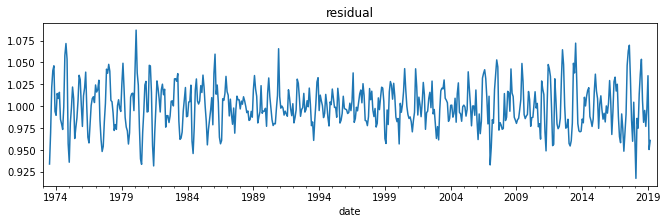

In [17]:
decom.resid.plot(title='residual',figsize=(11,3))

In [66]:
ts

,electricity
date,
1973-01-01,35.9728
1973-02-01,36.1334
1973-03-01,35.0625
1973-04-01,33.8416
1973-05-01,33.5107
...,...
2019-05-01,97.5860
2019-06-01,110.8580
2019-07-01,122.1014


<AxesSubplot:xlabel='date'>

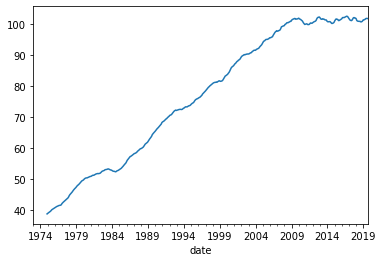

In [20]:
ts.rolling(window=24).mean().plot()

In [67]:
ts_decomp=pd.concat([decom.observed, decom.trend, decom.seasonal, decom.resid], axis=1).head(12)

In [68]:
ts_decomp.rename

,0,trend,seasonal,resid
date,,,,
1973-01-01,35.9728,NaN,1.055358,NaN
1973-02-01,36.1334,NaN,0.996086,NaN
1973-03-01,35.0625,NaN,0.945337,NaN
1973-04-01,33.8416,NaN,0.890877,NaN
1973-05-01,33.5107,NaN,0.918780,NaN
1973-06-01,36.4823,NaN,1.030843,NaN
1973-07-01,39.1412,37.223387,1.125749,0.934064
1973-08-01,41.4137,37.576442,1.136105,0.970085
1973-09-01,40.1639,37.850563,1.038776,1.021507


In [69]:
ts_decomp.resid[ts_decomp.resid.isna()] = 1

In [70]:
ts_decomp.trend[ts_decomp.trend.isna()] = 1

In [ ]:
##Sum of all the I(t) is 0.006 that means I(t) can be explained without cyclicity 

In [71]:
sum(ts_decomp.resid - 1)

0.006556435584483156

In [72]:
37.223388*1.125749*0.934064

39.14119702592594

#### ERROR 

In [74]:
np.mean(abs(ts_decomp.electricity-(ts_decomp.trend* ts_decomp.seasonal*1))/ts_decomp.)

SyntaxError: invalid syntax (<ipython-input-74-167cc57504b3>, line 1)

In [75]:
from statsmodels.tsa.stattools import acf, pacf_ols

In [76]:
acf(ts)

/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:652: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:662: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


array([1.        , 0.95647392, 0.87822982, 0.82945315, 0.841529  ,
       0.88813059, 0.91122643, 0.88196658, 0.82805401, 0.80579718,
       0.84356484, 0.9092393 , 0.94048579, 0.90057994, 0.82617458,
       0.77958655, 0.79320802, 0.8397309 , 0.86221357, 0.83379379,
       0.78177625, 0.76069374, 0.79757444, 0.8619873 , 0.89139636,
       0.85166914, 0.77857553, 0.73313065, 0.74640927, 0.79162819,
       0.81316289, 0.78520664, 0.73310236, 0.71201771, 0.74767556,
       0.80929857, 0.83784094, 0.79920595, 0.72847833, 0.6849164 ,
       0.69784608])

In [77]:
import statsmodels.tsa.api as smt

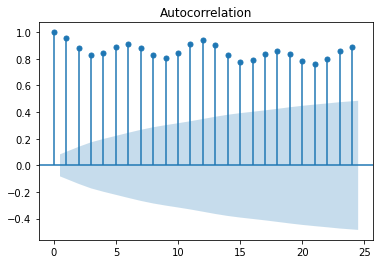

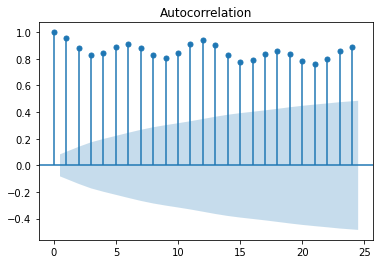

In [78]:
smt.graphics.plot_acf(ts, lags=24)

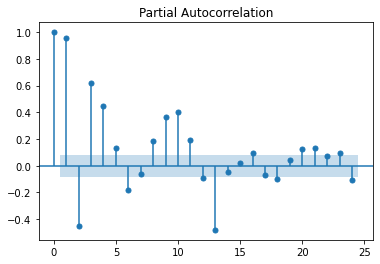

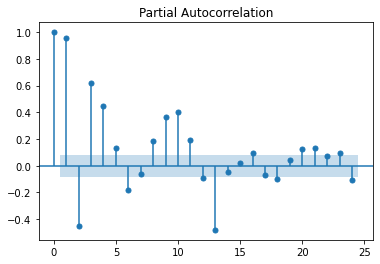

In [79]:
smt.graphics.plot_pacf(ts, lags=24)

In [80]:
#Is the series stationary?

# Perform Dickey-Fuller test:
from statsmodels.tsa.stattools import adfuller
adfuller(ts)   #p-value: 0.410   , since p-value is high, the series(ts) is not stationary

(-1.7405933729832361,
 0.4103281604468721,
 15,
 545,
 {'1%': -3.442405720052601,
  '5%': -2.866857804790472,
  '10%': -2.5696022094099824},
 2295.4096631180428)

In [81]:
ts_ln = np.log(ts)

In [82]:
adfuller(ts_ln) #p-value = 0.0347, since p-value is low, the series(ln_ts) is stationary

(-3.0018666788915676,
 0.03472044330065583,
 15,
 545,
 {'1%': -3.442405720052601,
  '5%': -2.866857804790472,
  '10%': -2.5696022094099824},
 -2515.663511859698)

In [58]:
#ts_diff = ts.diff().dropna()

In [108]:
#adfuller(ts_diff) #p-value=3.301343802151652e-12, since p-value is low, the series(ts_diff) is stationary

(-6.8848097229178675,
 1.4034181751310378e-09,
 14,
 545,
 {'1%': -3.442405720052601,
  '5%': -2.866857804790472,
  '10%': -2.5696022094099824},
 -2505.200358302891)

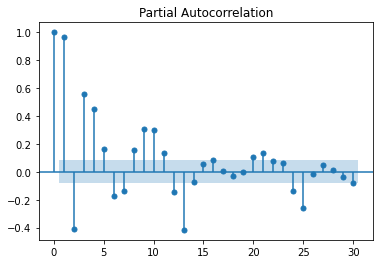

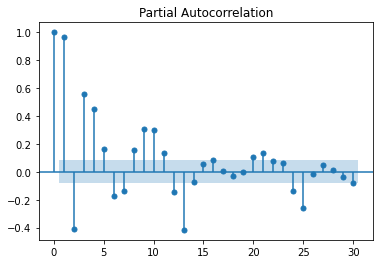

In [83]:
smt.graphics.plot_pacf(ts_ln,lags=30)
# p = 1

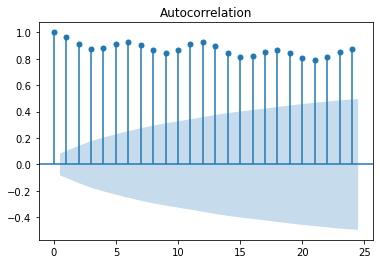

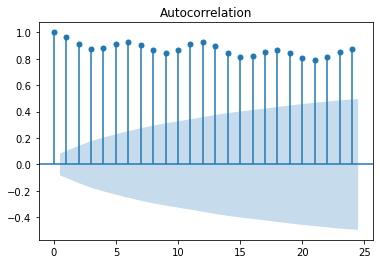

In [87]:
smt.graphics.plot_acf(ts_ln.electricity, lags=24)


#### Since we found that ts is stationary we will move on to  models 

### ETS Models

In [61]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [62]:
alpha = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
beta = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
gamma =[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

In [82]:
from sklearn.metrics import mean_absolute_error

def auto_hwm(timeseries, val_split_date, alpha=[None], beta=[None], gamma=[None], 
              trend=None, seasonal=None, periods=None, verbose=False):

    best_params = []
    actual = timeseries[val_split_date:]

    print('Evaluating Exponential Smoothing model for', len(alpha) * len(beta) * len(gamma), 'fits\n')

    for a in alpha:
        for b in beta:
            for g in gamma:

                    if(verbose == True):
                        print('Checking for', {'alpha': a, 'beta': b, 'gamma': g})

                    model = ExponentialSmoothing(timeseries, trend=trend, seasonal=seasonal, seasonal_periods=periods)
                    model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
                    f_cast = model.predict(model.params, start=actual.index[0])
                    #score = np.where(np.mean((mean_absolute_error(actual, f_cast)/actual)) > 0,np.mean((mean_absolute_error(actual, f_cast)/actual)),0)

                    best_params.append({'alpha': a, 'beta': b, 'gamma': g, 'mae': 1})

    return min(best_params, key=lambda x: x['mae'])

In [83]:
auto_hwm(ts, val_split_date ='2005-06-01' , alpha=alpha, beta=beta, gamma=gamma, 
              trend='mul', seasonal='mul', periods = 24, verbose=True)

Evaluating Exponential Smoothing model for 729 fits

Checking for {'alpha': 0.1, 'beta': 0.1, 'gamma': 0.1}
Checking for {'alpha': 0.1, 'beta': 0.1, 'gamma': 0.2}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
<ipython-input-82-0901dd446cb2>:19: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Checking for {'alpha': 0.1, 'beta': 0.1, 'gamma': 0.3}
Checking for {'alpha': 0.1, 'beta': 0.1, 'gamma': 0.4}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Checking for {'alpha': 0.1, 'beta': 0.1, 'gamma': 0.5}
Checking for {'alpha': 0.1, 'beta': 0.1, 'gamma': 0.6}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Checking for {'alpha': 0.1, 'beta': 0.1, 'gamma': 0.7}
Checking for {'alpha': 0.1, 'beta': 0.1, 'gamma': 0.8}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Checking for {'alpha': 0.1, 'beta': 0.1, 'gamma': 0.9}
Checking for {'alpha': 0.1, 'beta': 0.2, 'gamma': 0.1}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Checking for {'alpha': 0.1, 'beta': 0.2, 'gamma': 0.2}
Checking for {'alpha': 0.1, 'beta': 0.2, 'gamma': 0.3}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Checking for {'alpha': 0.1, 'beta': 0.2, 'gamma': 0.4}
Checking for {'alpha': 0.1, 'beta': 0.2, 'gamma': 0.5}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Checking for {'alpha': 0.1, 'beta': 0.2, 'gamma': 0.6}
Checking for {'alpha': 0.1, 'beta': 0.2, 'gamma': 0.7}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Checking for {'alpha': 0.1, 'beta': 0.2, 'gamma': 0.8}
Checking for {'alpha': 0.1, 'beta': 0.2, 'gamma': 0.9}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Checking for {'alpha': 0.1, 'beta': 0.3, 'gamma': 0.1}
Checking for {'alpha': 0.1, 'beta': 0.3, 'gamma': 0.2}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Checking for {'alpha': 0.1, 'beta': 0.3, 'gamma': 0.3}
Checking for {'alpha': 0.1, 'beta': 0.3, 'gamma': 0.4}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Checking for {'alpha': 0.1, 'beta': 0.3, 'gamma': 0.5}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Checking for {'alpha': 0.1, 'beta': 0.3, 'gamma': 0.6}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Checking for {'alpha': 0.1, 'beta': 0.3, 'gamma': 0.7}
Checking for {'alpha': 0.1, 'beta': 0.3, 'gamma': 0.8}
Checking for {'alpha': 0.1, 'beta': 0.3, 'gamma': 0.9}
Checking for {'alpha': 0.1, 'beta': 0.4, 'gamma': 0.1}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Opt

Checking for {'alpha': 0.1, 'beta': 0.4, 'gamma': 0.2}
Checking for {'alpha': 0.1, 'beta': 0.4, 'gamma': 0.3}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Checking for {'alpha': 0.1, 'beta': 0.4, 'gamma': 0.4}
Checking for {'alpha': 0.1, 'beta': 0.4, 'gamma': 0.5}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Checking for {'alpha': 0.1, 'beta': 0.4, 'gamma': 0.6}
Checking for {'alpha': 0.1, 'beta': 0.4, 'gamma': 0.7}
Checking for {'alpha': 0.1, 'beta': 0.4, 'gamma': 0.8}
Checking for {'alpha': 0.1, 'beta': 0.4, 'gamma': 0.9}
Checking for {'alpha': 0.1, 'beta': 0.5, 'gamma': 0.1}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequenc

Checking for {'alpha': 0.1, 'beta': 0.5, 'gamma': 0.2}
Checking for {'alpha': 0.1, 'beta': 0.5, 'gamma': 0.3}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Checking for {'alpha': 0.1, 'beta': 0.5, 'gamma': 0.4}
Checking for {'alpha': 0.1, 'beta': 0.5, 'gamma': 0.5}
Checking for {'alpha': 0.1, 'beta': 0.5, 'gamma': 0.6}
Checking for {'alpha': 0.1, 'beta': 0.5, 'gamma': 0.7}
Checking for {'alpha': 0.1, 'beta': 0.5, 'gamma': 0.8}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequenc

Checking for {'alpha': 0.1, 'beta': 0.5, 'gamma': 0.9}
Checking for {'alpha': 0.1, 'beta': 0.6, 'gamma': 0.1}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Checking for {'alpha': 0.1, 'beta': 0.6, 'gamma': 0.2}
Checking for {'alpha': 0.1, 'beta': 0.6, 'gamma': 0.3}
Checking for {'alpha': 0.1, 'beta': 0.6, 'gamma': 0.4}
Checking for {'alpha': 0.1, 'beta': 0.6, 'gamma': 0.5}
Checking for {'alpha': 0.1, 'beta': 0.6, 'gamma': 0.6}
Checking for 

/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequenc

{'alpha': 0.1, 'beta': 0.6, 'gamma': 0.7}
Checking for {'alpha': 0.1, 'beta': 0.6, 'gamma': 0.8}
Checking for {'alpha': 0.1, 'beta': 0.6, 'gamma': 0.9}
Checking for {'alpha': 0.1, 'beta': 0.7, 'gamma': 0.1}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequenc

Checking for {'alpha': 0.1, 'beta': 0.7, 'gamma': 0.2}
Checking for {'alpha': 0.1, 'beta': 0.7, 'gamma': 0.3}
Checking for {'alpha': 0.1, 'beta': 0.7, 'gamma': 0.4}
Checking for {'alpha': 0.1, 'beta': 0.7, 'gamma': 0.5}
Checking for {'alpha': 0.1, 'beta': 0.7, 'gamma': 0.6}
Checking for {'alpha': 0.1, 'beta': 0.7, 'gamma': 0.7}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals

Checking for {'alpha': 0.1, 'beta': 0.7, 'gamma': 0.8}
Checking for {'alpha': 0.1, 'beta': 0.7, 'gamma': 0.9}
Checking for {'alpha': 0.1, 'beta': 0.8, 'gamma': 0.1}
Checking for {'alpha': 0.1, 'beta': 0.8, 'gamma': 0.2}
Checking for {'alpha': 0.1, 'beta': 0.8, 'gamma': 0.3}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals

Checking for {'alpha': 0.1, 'beta': 0.8, 'gamma': 0.4}
Checking for {'alpha': 0.1, 'beta': 0.8, 'gamma': 0.5}
Checking for {'alpha': 0.1, 'beta': 0.8, 'gamma': 0.6}
Checking for {'alpha': 0.1, 'beta': 0.8, 'gamma': 0.7}
Checking for {'alpha': 0.1, 'beta': 0.8, 'gamma': 0.8}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals

Checking for {'alpha': 0.1, 'beta': 0.8, 'gamma': 0.9}
Checking for {'alpha': 0.1, 'beta': 0.9, 'gamma': 0.1}
Checking for {'alpha': 0.1, 'beta': 0.9, 'gamma': 0.2}
Checking for {'alpha': 0.1, 'beta': 0.9, 'gamma': 0.3}
Checking for {'alpha': 0.1, 'beta': 0.9, 'gamma': 0.4}
Checking for {'alpha': 0.1, 'beta': 0.9, 'gamma': 0.5}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequenc

Checking for {'alpha': 0.1, 'beta': 0.9, 'gamma': 0.6}
Checking for {'alpha': 0.1, 'beta': 0.9, 'gamma': 0.7}
Checking for {'alpha': 0.1, 'beta': 0.9, 'gamma': 0.8}
Checking for {'alpha': 0.1, 'beta': 0.9, 'gamma': 0.9}
Checking for {'alpha': 0.2, 'beta': 0.1, 'gamma': 0.1}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequenc

Checking for {'alpha': 0.2, 'beta': 0.1, 'gamma': 0.2}
Checking for {'alpha': 0.2, 'beta': 0.1, 'gamma': 0.3}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Checking for {'alpha': 0.2, 'beta': 0.1, 'gamma': 0.4}
Checking for {'alpha': 0.2, 'beta': 0.1, 'gamma': 0.5}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Checking for {'alpha': 0.2, 'beta': 0.1, 'gamma': 0.6}
Checking for {'alpha': 0.2, 'beta': 0.1, 'gamma': 0.7}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Checking for {'alpha': 0.2, 'beta': 0.1, 'gamma': 0.8}
Checking for {'alpha': 0.2, 'beta': 0.1, 'gamma': 0.9}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Checking for {'alpha': 0.2, 'beta': 0.2, 'gamma': 0.1}
Checking for {'alpha': 0.2, 'beta': 0.2, 'gamma': 0.2}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Checking for {'alpha': 0.2, 'beta': 0.2, 'gamma': 0.3}
Checking for {'alpha': 0.2, 'beta': 0.2, 'gamma': 0.4}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Checking for {'alpha': 0.2, 'beta': 0.2, 'gamma': 0.5}
Checking for {'alpha': 0.2, 'beta': 0.2, 'gamma': 0.6}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Checking for {'alpha': 0.2, 'beta': 0.2, 'gamma': 0.7}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequenc

Checking for {'alpha': 0.2, 'beta': 0.2, 'gamma': 0.8}
Checking for {'alpha': 0.2, 'beta': 0.2, 'gamma': 0.9}
Checking for {'alpha': 0.2, 'beta': 0.3, 'gamma': 0.1}
Checking for {'alpha': 0.2, 'beta': 0.3, 'gamma': 0.2}
Checking for {'alpha': 0.2, 'beta': 0.3, 'gamma': 0.3}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Checking for {'alpha': 0.2, 'beta': 0.3, 'gamma': 0.4}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequenc

Checking for {'alpha': 0.2, 'beta': 0.3, 'gamma': 0.5}
Checking for {'alpha': 0.2, 'beta': 0.3, 'gamma': 0.6}
Checking for {'alpha': 0.2, 'beta': 0.3, 'gamma': 0.7}
Checking for {'alpha': 0.2, 'beta': 0.3, 'gamma': 0.8}
Checking for {'alpha': 0.2, 'beta': 0.3, 'gamma': 0.9}
Checking for {'alpha': 0.2, 'beta': 0.4, 'gamma': 0.1}
Checking for {'alpha': 0.2, 'beta': 0.4, 'gamma': 0.2}
Checking for {'alpha': 0.2, 'beta': 0.4, 'gamma': 0.3}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Opt

Checking for {'alpha': 0.2, 'beta': 0.4, 'gamma': 0.4}
Checking for {'alpha': 0.2, 'beta': 0.4, 'gamma': 0.5}
Checking for {'alpha': 0.2, 'beta': 0.4, 'gamma': 0.6}
Checking for {'alpha': 0.2, 'beta': 0.4, 'gamma': 0.7}
Checking for {'alpha': 0.2, 'beta': 0.4, 'gamma': 0.8}
Checking for {'alpha': 0.2, 'beta': 0.4, 'gamma': 0.9}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Checking for {'alpha': 0.2, 'beta': 0.5, 'gamma': 0.1}
Checking for {'alpha': 0.2, 'beta': 0.5, 'gamma': 0.2}
Checking for {'alpha': 0.2, 'beta': 0.5, 'gamma': 0.3}
Checking for {'alpha': 0.2, 'beta': 0.5, 'gamma': 0.4}
Checking for {'alpha': 0.2, 'beta': 0.5, 'gamma': 0.5}
Checking for {'alpha': 0.2, 'beta': 0.5, 'gamma': 0.6}
Checking for {'alpha': 0.2, 'beta': 0.5, 'gamma': 0.7}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequenc

Checking for {'alpha': 0.2, 'beta': 0.5, 'gamma': 0.8}
Checking for {'alpha': 0.2, 'beta': 0.5, 'gamma': 0.9}
Checking for {'alpha': 0.2, 'beta': 0.6, 'gamma': 0.1}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequenc

Checking for {'alpha': 0.2, 'beta': 0.6, 'gamma': 0.2}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Checking for {'alpha': 0.2, 'beta': 0.6, 'gamma': 0.3}
Checking for {'alpha': 0.2, 'beta': 0.6, 'gamma': 0.4}
Checking for {'alpha': 0.2, 'beta': 0.6, 'gamma': 0.5}
Checking for {'alpha': 0.2, 'beta': 0.6, 'gamma': 0.6}
Checking for {'alpha': 0.2, 'beta': 0.6, 'gamma': 0.7}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequenc

Checking for {'alpha': 0.2, 'beta': 0.6, 'gamma': 0.8}
Checking for {'alpha': 0.2, 'beta': 0.6, 'gamma': 0.9}
Checking for {'alpha': 0.2, 'beta': 0.7, 'gamma': 0.1}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequenc

Checking for {'alpha': 0.2, 'beta': 0.7, 'gamma': 0.2}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Checking for {'alpha': 0.2, 'beta': 0.7, 'gamma': 0.3}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequenc

Checking for {'alpha': 0.2, 'beta': 0.7, 'gamma': 0.4}
Checking for {'alpha': 0.2, 'beta': 0.7, 'gamma': 0.5}
Checking for {'alpha': 0.2, 'beta': 0.7, 'gamma': 0.6}
Checking for {'alpha': 0.2, 'beta': 0.7, 'gamma': 0.7}
Checking for {'alpha': 0.2, 'beta': 0.7, 'gamma': 0.8}
Checking for {'alpha': 0.2, 'beta': 0.7, 'gamma': 0.9}
Checking for {'alpha': 0.2, 'beta': 0.8, 'gamma': 0.1}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Checking for {'alpha': 0.2, 'beta': 0.8, 'gamma': 0.2}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Checking for {'alpha': 0.2, 'beta': 0.8, 'gamma': 0.3}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequenc

Checking for {'alpha': 0.2, 'beta': 0.8, 'gamma': 0.4}
Checking for {'alpha': 0.2, 'beta': 0.8, 'gamma': 0.5}
Checking for {'alpha': 0.2, 'beta': 0.8, 'gamma': 0.6}
Checking for {'alpha': 0.2, 'beta': 0.8, 'gamma': 0.7}
Checking for {'alpha': 0.2, 'beta': 0.8, 'gamma': 0.8}
Checking for {'alpha': 0.2, 'beta': 0.8, 'gamma': 0.9}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Checking for {'alpha': 0.2, 'beta': 0.9, 'gamma': 0.1}
Checking for {'alpha': 0.2, 'beta': 0.9, 'gamma': 0.2}
Checking for {'alpha': 0.2, 'beta': 0.9, 'gamma': 0.3}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Checking for {'alpha': 0.2, 'beta': 0.9, 'gamma': 0.4}
Checking for {'alpha': 0.2, 'beta': 0.9, 'gamma': 0.5}
Checking for {'alpha': 0.2, 'beta': 0.9, 'gamma': 0.6}
Checking for {'alpha': 0.2, 'beta': 0.9, 'gamma': 0.7}
Checking for {'alpha': 0.2, 'beta': 0.9, 'gamma': 0.8}
Checking for {'alpha': 0.2, 'beta': 0.9, 'gamma': 0.9}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequenc

Checking for {'alpha': 0.3, 'beta': 0.1, 'gamma': 0.1}
Checking for {'alpha': 0.3, 'beta': 0.1, 'gamma': 0.2}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Checking for {'alpha': 0.3, 'beta': 0.1, 'gamma': 0.3}
Checking for {'alpha': 0.3, 'beta': 0.1, 'gamma': 0.4}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Checking for {'alpha': 0.3, 'beta': 0.1, 'gamma': 0.5}
Checking for {'alpha': 0.3, 'beta': 0.1, 'gamma': 0.6}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Checking for {'alpha': 0.3, 'beta': 0.1, 'gamma': 0.7}
Checking for {'alpha': 0.3, 'beta': 0.1, 'gamma': 0.8}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Checking for {'alpha': 0.3, 'beta': 0.1, 'gamma': 0.9}
Checking for {'alpha': 0.3, 'beta': 0.2, 'gamma': 0.1}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Checking for {'alpha': 0.3, 'beta': 0.2, 'gamma': 0.2}
Checking for {'alpha': 0.3, 'beta': 0.2, 'gamma': 0.3}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Checking for {'alpha': 0.3, 'beta': 0.2, 'gamma': 0.4}
Checking for {'alpha': 0.3, 'beta': 0.2, 'gamma': 0.5}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Checking for {'alpha': 0.3, 'beta': 0.2, 'gamma': 0.6}
Checking for {'alpha': 0.3, 'beta': 0.2, 'gamma': 0.7}
Checking for {'alpha': 0.3, 'beta': 0.2, 'gamma': 0.8}
Checking for {'alpha': 0.3, 'beta': 0.2, 'gamma': 0.9}
Checking for {'alpha': 0.3, 'beta': 0.3, 'gamma': 0.1}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequenc

Checking for {'alpha': 0.3, 'beta': 0.3, 'gamma': 0.2}
Checking for {'alpha': 0.3, 'beta': 0.3, 'gamma': 0.3}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Checking for {'alpha': 0.3, 'beta': 0.3, 'gamma': 0.4}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequenc

Checking for {'alpha': 0.3, 'beta': 0.3, 'gamma': 0.5}
Checking for {'alpha': 0.3, 'beta': 0.3, 'gamma': 0.6}
Checking for {'alpha': 0.3, 'beta': 0.3, 'gamma': 0.7}
Checking for {'alpha': 0.3, 'beta': 0.3, 'gamma': 0.8}
Checking for {'alpha': 0.3, 'beta': 0.3, 'gamma': 0.9}
Checking for {'alpha': 0.3, 'beta': 0.4, 'gamma': 0.1}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Checking for {'alpha': 0.3, 'beta': 0.4, 'gamma': 0.2}
Checking for {'alpha': 0.3, 'beta': 0.4, 'gamma': 0.3}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Checking for {'alpha': 0.3, 'beta': 0.4, 'gamma': 0.4}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals

Checking for {'alpha': 0.3, 'beta': 0.4, 'gamma': 0.5}
Checking for {'alpha': 0.3, 'beta': 0.4, 'gamma': 0.6}
Checking for {'alpha': 0.3, 'beta': 0.4, 'gamma': 0.7}
Checking for {'alpha': 0.3, 'beta': 0.4, 'gamma': 0.8}
Checking for {'alpha': 0.3, 'beta': 0.4, 'gamma': 0.9}
Checking for {'alpha': 0.3, 'beta': 0.5, 'gamma': 0.1}
Checking for {'alpha': 0.3, 'beta': 0.5, 'gamma': 0.2}
Checking for {'alpha': 0.3, 'beta': 0.5, 'gamma': 0.3}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Checking for {'alpha': 0.3, 'beta': 0.5, 'gamma': 0.4}
Checking for {'alpha': 0.3, 'beta': 0.5, 'gamma': 0.5}
Checking for {'alpha': 0.3, 'beta': 0.5, 'gamma': 0.6}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Opt

Checking for {'alpha': 0.3, 'beta': 0.5, 'gamma': 0.7}
Checking for {'alpha': 0.3, 'beta': 0.5, 'gamma': 0.8}
Checking for {'alpha': 0.3, 'beta': 0.5, 'gamma': 0.9}
Checking for {'alpha': 0.3, 'beta': 0.6, 'gamma': 0.1}
Checking for {'alpha': 0.3, 'beta': 0.6, 'gamma': 0.2}
Checking for {'alpha': 0.3, 'beta': 0.6, 'gamma': 0.3}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Checking for {'alpha': 0.3, 'beta': 0.6, 'gamma': 0.4}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequenc

Checking for {'alpha': 0.3, 'beta': 0.6, 'gamma': 0.5}
Checking for {'alpha': 0.3, 'beta': 0.6, 'gamma': 0.6}
Checking for {'alpha': 0.3, 'beta': 0.6, 'gamma': 0.7}
Checking for {'alpha': 0.3, 'beta': 0.6, 'gamma': 0.8}
Checking for {'alpha': 0.3, 'beta': 0.6, 'gamma': 0.9}
Checking for {'alpha': 0.3, 'beta': 0.7, 'gamma': 0.1}
Checking for {'alpha': 0.3, 'beta': 0.7, 'gamma': 0.2}
Checking for {'alpha': 0.3, 'beta': 0.7, 'gamma': 0.3}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Opt

Checking for {'alpha': 0.3, 'beta': 0.7, 'gamma': 0.4}
Checking for {'alpha': 0.3, 'beta': 0.7, 'gamma': 0.5}
Checking for {'alpha': 0.3, 'beta': 0.7, 'gamma': 0.6}
Checking for {'alpha': 0.3, 'beta': 0.7, 'gamma': 0.7}
Checking for {'alpha': 0.3, 'beta': 0.7, 'gamma': 0.8}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequenc

Checking for {'alpha': 0.3, 'beta': 0.7, 'gamma': 0.9}
Checking for {'alpha': 0.3, 'beta': 0.8, 'gamma': 0.1}
Checking for {'alpha': 0.3, 'beta': 0.8, 'gamma': 0.2}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequenc

Checking for {'alpha': 0.3, 'beta': 0.8, 'gamma': 0.3}
Checking for {'alpha': 0.3, 'beta': 0.8, 'gamma': 0.4}
Checking for {'alpha': 0.3, 'beta': 0.8, 'gamma': 0.5}
Checking for {'alpha': 0.3, 'beta': 0.8, 'gamma': 0.6}
Checking for {'alpha': 0.3, 'beta': 0.8, 'gamma': 0.7}
Checking for {'alpha': 0.3, 'beta': 0.8, 'gamma': 0.8}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequenc

Checking for {'alpha': 0.3, 'beta': 0.8, 'gamma': 0.9}
Checking for {'alpha': 0.3, 'beta': 0.9, 'gamma': 0.1}
Checking for {'alpha': 0.3, 'beta': 0.9, 'gamma': 0.2}
Checking for {'alpha': 0.3, 'beta': 0.9, 'gamma': 0.3}
Checking for {'alpha': 0.3, 'beta': 0.9, 'gamma': 0.4}
Checking for {'alpha': 0.3, 'beta': 0.9, 'gamma': 0.5}
Checking for {'alpha': 0.3, 'beta': 0.9, 'gamma': 0.6}
Checking for {'alpha': 0.3, 'beta': 0.9, 'gamma': 0.7}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequenc

Checking for {'alpha': 0.3, 'beta': 0.9, 'gamma': 0.8}
Checking for {'alpha': 0.3, 'beta': 0.9, 'gamma': 0.9}
Checking for {'alpha': 0.4, 'beta': 0.1, 'gamma': 0.1}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequenc

Checking for {'alpha': 0.4, 'beta': 0.1, 'gamma': 0.2}
Checking for {'alpha': 0.4, 'beta': 0.1, 'gamma': 0.3}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Checking for {'alpha': 0.4, 'beta': 0.1, 'gamma': 0.4}
Checking for {'alpha': 0.4, 'beta': 0.1, 'gamma': 0.5}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Checking for {'alpha': 0.4, 'beta': 0.1, 'gamma': 0.6}
Checking for {'alpha': 0.4, 'beta': 0.1, 'gamma': 0.7}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Checking for {'alpha': 0.4, 'beta': 0.1, 'gamma': 0.8}
Checking for {'alpha': 0.4, 'beta': 0.1, 'gamma': 0.9}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Checking for {'alpha': 0.4, 'beta': 0.2, 'gamma': 0.1}
Checking for {'alpha': 0.4, 'beta': 0.2, 'gamma': 0.2}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Checking for {'alpha': 0.4, 'beta': 0.2, 'gamma': 0.3}
Checking for {'alpha': 0.4, 'beta': 0.2, 'gamma': 0.4}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Checking for {'alpha': 0.4, 'beta': 0.2, 'gamma': 0.5}
Checking for {'alpha': 0.4, 'beta': 0.2, 'gamma': 0.6}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Checking for {'alpha': 0.4, 'beta': 0.2, 'gamma': 0.7}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequenc

Checking for {'alpha': 0.4, 'beta': 0.2, 'gamma': 0.8}
Checking for {'alpha': 0.4, 'beta': 0.2, 'gamma': 0.9}
Checking for {'alpha': 0.4, 'beta': 0.3, 'gamma': 0.1}
Checking for {'alpha': 0.4, 'beta': 0.3, 'gamma': 0.2}
Checking for {'alpha': 0.4, 'beta': 0.3, 'gamma': 0.3}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Checking for {'alpha': 0.4, 'beta': 0.3, 'gamma': 0.4}
Checking for {'alpha': 0.4, 'beta': 0.3, 'gamma': 0.5}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Opt

Checking for {'alpha': 0.4, 'beta': 0.3, 'gamma': 0.6}
Checking for {'alpha': 0.4, 'beta': 0.3, 'gamma': 0.7}
Checking for {'alpha': 0.4, 'beta': 0.3, 'gamma': 0.8}
Checking for {'alpha': 0.4, 'beta': 0.3, 'gamma': 0.9}
Checking for {'alpha': 0.4, 'beta': 0.4, 'gamma': 0.1}
Checking for {'alpha': 0.4, 'beta': 0.4, 'gamma': 0.2}
Checking for {'alpha': 0.4, 'beta': 0.4, 'gamma': 0.3}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Checking for {'alpha': 0.4, 'beta': 0.4, 'gamma': 0.4}
Checking for {'alpha': 0.4, 'beta': 0.4, 'gamma': 0.5}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Opt

Checking for {'alpha': 0.4, 'beta': 0.4, 'gamma': 0.6}
Checking for {'alpha': 0.4, 'beta': 0.4, 'gamma': 0.7}
Checking for {'alpha': 0.4, 'beta': 0.4, 'gamma': 0.8}
Checking for {'alpha': 0.4, 'beta': 0.4, 'gamma': 0.9}
Checking for {'alpha': 0.4, 'beta': 0.5, 'gamma': 0.1}
Checking for {'alpha': 0.4, 'beta': 0.5, 'gamma': 0.2}
Checking for {'alpha': 0.4, 'beta': 0.5, 'gamma': 0.3}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Checking for {'alpha': 0.4, 'beta': 0.5, 'gamma': 0.4}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequenc

Checking for {'alpha': 0.4, 'beta': 0.5, 'gamma': 0.5}
Checking for {'alpha': 0.4, 'beta': 0.5, 'gamma': 0.6}
Checking for {'alpha': 0.4, 'beta': 0.5, 'gamma': 0.7}
Checking for {'alpha': 0.4, 'beta': 0.5, 'gamma': 0.8}
Checking for {'alpha': 0.4, 'beta': 0.5, 'gamma': 0.9}
Checking for {'alpha': 0.4, 'beta': 0.6, 'gamma': 0.1}
Checking for {'alpha': 0.4, 'beta': 0.6, 'gamma': 0.2}
Checking for {'alpha': 0.4, 'beta': 0.6, 'gamma': 0.3}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Opt

Checking for {'alpha': 0.4, 'beta': 0.6, 'gamma': 0.4}
Checking for {'alpha': 0.4, 'beta': 0.6, 'gamma': 0.5}
Checking for {'alpha': 0.4, 'beta': 0.6, 'gamma': 0.6}
Checking for {'alpha': 0.4, 'beta': 0.6, 'gamma': 0.7}
Checking for {'alpha': 0.4, 'beta': 0.6, 'gamma': 0.8}
Checking for {'alpha': 0.4, 'beta': 0.6, 'gamma': 0.9}
Checking for {'alpha': 0.4, 'beta': 0.7, 'gamma': 0.1}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Checking for {'alpha': 0.4, 'beta': 0.7, 'gamma': 0.2}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals

Checking for {'alpha': 0.4, 'beta': 0.7, 'gamma': 0.3}
Checking for {'alpha': 0.4, 'beta': 0.7, 'gamma': 0.4}
Checking for {'alpha': 0.4, 'beta': 0.7, 'gamma': 0.5}
Checking for {'alpha': 0.4, 'beta': 0.7, 'gamma': 0.6}
Checking for {'alpha': 0.4, 'beta': 0.7, 'gamma': 0.7}
Checking for {'alpha': 0.4, 'beta': 0.7, 'gamma': 0.8}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequenc

Checking for {'alpha': 0.4, 'beta': 0.7, 'gamma': 0.9}
Checking for {'alpha': 0.4, 'beta': 0.8, 'gamma': 0.1}
Checking for {'alpha': 0.4, 'beta': 0.8, 'gamma': 0.2}
Checking for {'alpha': 0.4, 'beta': 0.8, 'gamma': 0.3}
Checking for {'alpha': 0.4, 'beta': 0.8, 'gamma': 0.4}
Checking for {'alpha': 0.4, 'beta': 0.8, 'gamma': 0.5}
Checking for {'alpha': 0.4, 'beta': 0.8, 'gamma': 0.6}
Checking for {'alpha': 0.4, 'beta': 0.8, 'gamma': 0.7}
Checking for {'alpha': 0.4, 'beta': 0.8, 'gamma': 0.8}
Checking for {'alpha': 0.4, 'beta': 0.8, 'gamma': 0.9}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequenc

Checking for {'alpha': 0.4, 'beta': 0.9, 'gamma': 0.1}
Checking for {'alpha': 0.4, 'beta': 0.9, 'gamma': 0.2}
Checking for {'alpha': 0.4, 'beta': 0.9, 'gamma': 0.3}
Checking for {'alpha': 0.4, 'beta': 0.9, 'gamma': 0.4}
Checking for {'alpha': 0.4, 'beta': 0.9, 'gamma': 0.5}
Checking for {'alpha': 0.4, 'beta': 0.9, 'gamma': 0.6}
Checking for {'alpha': 0.4, 'beta': 0.9, 'gamma': 0.7}
Checking for {'alpha': 0.4, 'beta': 0.9, 'gamma': 0.8}
Checking for {'alpha': 0.4, 'beta': 0.9, 'gamma': 0.9}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequenc

Checking for {'alpha': 0.5, 'beta': 0.1, 'gamma': 0.1}
Checking for {'alpha': 0.5, 'beta': 0.1, 'gamma': 0.2}
Checking for {'alpha': 0.5, 'beta': 0.1, 'gamma': 0.3}
Checking for {'alpha': 0.5, 'beta': 0.1, 'gamma': 0.4}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Checking for {'alpha': 0.5, 'beta': 0.1, 'gamma': 0.5}
Checking for {'alpha': 0.5, 'beta': 0.1, 'gamma': 0.6}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Checking for {'alpha': 0.5, 'beta': 0.1, 'gamma': 0.7}
Checking for {'alpha': 0.5, 'beta': 0.1, 'gamma': 0.8}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Checking for {'alpha': 0.5, 'beta': 0.1, 'gamma': 0.9}
Checking for {'alpha': 0.5, 'beta': 0.2, 'gamma': 0.1}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Checking for {'alpha': 0.5, 'beta': 0.2, 'gamma': 0.2}
Checking for {'alpha': 0.5, 'beta': 0.2, 'gamma': 0.3}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Checking for {'alpha': 0.5, 'beta': 0.2, 'gamma': 0.4}
Checking for {'alpha': 0.5, 'beta': 0.2, 'gamma': 0.5}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Checking for {'alpha': 0.5, 'beta': 0.2, 'gamma': 0.6}
Checking for {'alpha': 0.5, 'beta': 0.2, 'gamma': 0.7}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Checking for {'alpha': 0.5, 'beta': 0.2, 'gamma': 0.8}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Checking for {'alpha': 0.5, 'beta': 0.2, 'gamma': 0.9}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Checking for {'alpha': 0.5, 'beta': 0.3, 'gamma': 0.1}
Checking for {'alpha': 0.5, 'beta': 0.3, 'gamma': 0.2}
Checking for {'alpha': 0.5, 'beta': 0.3, 'gamma': 0.3}
Checking for {'alpha': 0.5, 'beta': 0.3, 'gamma': 0.4}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Checking for {'alpha': 0.5, 'beta': 0.3, 'gamma': 0.5}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Checking for {'alpha': 0.5, 'beta': 0.3, 'gamma': 0.6}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Checking for {'alpha': 0.5, 'beta': 0.3, 'gamma': 0.7}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Checking for {'alpha': 0.5, 'beta': 0.3, 'gamma': 0.8}
Checking for {'alpha': 0.5, 'beta': 0.3, 'gamma': 0.9}
Checking for {'alpha': 0.5, 'beta': 0.4, 'gamma': 0.1}
Checking for {'alpha': 0.5, 'beta': 0.4, 'gamma': 0.2}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequenc

Checking for {'alpha': 0.5, 'beta': 0.4, 'gamma': 0.3}
Checking for {'alpha': 0.5, 'beta': 0.4, 'gamma': 0.4}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Checking for {'alpha': 0.5, 'beta': 0.4, 'gamma': 0.5}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Checking for {'alpha': 0.5, 'beta': 0.4, 'gamma': 0.6}
Checking for {'alpha': 0.5, 'beta': 0.4, 'gamma': 0.7}
Checking for {'alpha': 0.5, 'beta': 0.4, 'gamma': 0.8}
Checking for {'alpha': 0.5, 'beta': 0.4, 'gamma': 0.9}
Checking for {'alpha': 0.5, 'beta': 0.5, 'gamma': 0.1}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequenc

Checking for {'alpha': 0.5, 'beta': 0.5, 'gamma': 0.2}
Checking for {'alpha': 0.5, 'beta': 0.5, 'gamma': 0.3}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Checking for {'alpha': 0.5, 'beta': 0.5, 'gamma': 0.4}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequenc

Checking for {'alpha': 0.5, 'beta': 0.5, 'gamma': 0.5}
Checking for {'alpha': 0.5, 'beta': 0.5, 'gamma': 0.6}
Checking for {'alpha': 0.5, 'beta': 0.5, 'gamma': 0.7}
Checking for {'alpha': 0.5, 'beta': 0.5, 'gamma': 0.8}
Checking for {'alpha': 0.5, 'beta': 0.5, 'gamma': 0.9}
Checking for {'alpha': 0.5, 'beta': 0.6, 'gamma': 0.1}
Checking for {'alpha': 0.5, 'beta': 0.6, 'gamma': 0.2}
Checking for {'alpha': 0.5, 'beta': 0.6, 'gamma': 0.3}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Checking for {'alpha': 0.5, 'beta': 0.6, 'gamma': 0.4}
Checking for {'alpha': 0.5, 'beta': 0.6, 'gamma': 0.5}
Checking for {'alpha': 0.5, 'beta': 0.6, 'gamma': 0.6}
Checking for {'alpha': 0.5, 'beta': 0.6, 'gamma': 0.7}
Checking for {'alpha': 0.5, 'beta': 0.6, 'gamma': 0.8}
Checking for {'alpha': 0.5, 'beta': 0.6, 'gamma': 0.9}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequenc

Checking for {'alpha': 0.5, 'beta': 0.7, 'gamma': 0.1}
Checking for {'alpha': 0.5, 'beta': 0.7, 'gamma': 0.2}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Checking for {'alpha': 0.5, 'beta': 0.7, 'gamma': 0.3}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequenc

Checking for {'alpha': 0.5, 'beta': 0.7, 'gamma': 0.4}
Checking for {'alpha': 0.5, 'beta': 0.7, 'gamma': 0.5}
Checking for {'alpha': 0.5, 'beta': 0.7, 'gamma': 0.6}
Checking for {'alpha': 0.5, 'beta': 0.7, 'gamma': 0.7}
Checking for {'alpha': 0.5, 'beta': 0.7, 'gamma': 0.8}
Checking for {'alpha': 0.5, 'beta': 0.7, 'gamma': 0.9}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Checking for {'alpha': 0.5, 'beta': 0.8, 'gamma': 0.1}
Checking for {'alpha': 0.5, 'beta': 0.8, 'gamma': 0.2}
Checking for {'alpha': 0.5, 'beta': 0.8, 'gamma': 0.3}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequenc

Checking for {'alpha': 0.5, 'beta': 0.8, 'gamma': 0.4}
Checking for {'alpha': 0.5, 'beta': 0.8, 'gamma': 0.5}
Checking for {'alpha': 0.5, 'beta': 0.8, 'gamma': 0.6}
Checking for {'alpha': 0.5, 'beta': 0.8, 'gamma': 0.7}
Checking for {'alpha': 0.5, 'beta': 0.8, 'gamma': 0.8}
Checking for {'alpha': 0.5, 'beta': 0.8, 'gamma': 0.9}
Checking for {'alpha': 0.5, 'beta': 0.9, 'gamma': 0.1}
Checking for {'alpha': 0.5, 'beta': 0.9, 'gamma': 0.2}
Checking for {'alpha': 0.5, 'beta': 0.9, 'gamma': 0.3}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Opt

Checking for {'alpha': 0.5, 'beta': 0.9, 'gamma': 0.4}
Checking for {'alpha': 0.5, 'beta': 0.9, 'gamma': 0.5}
Checking for {'alpha': 0.5, 'beta': 0.9, 'gamma': 0.6}
Checking for {'alpha': 0.5, 'beta': 0.9, 'gamma': 0.7}
Checking for {'alpha': 0.5, 'beta': 0.9, 'gamma': 0.8}
Checking for {'alpha': 0.5, 'beta': 0.9, 'gamma': 0.9}
Checking for {'alpha': 0.6, 'beta': 0.1, 'gamma': 0.1}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Checking for {'alpha': 0.6, 'beta': 0.1, 'gamma': 0.2}
Checking for {'alpha': 0.6, 'beta': 0.1, 'gamma': 0.3}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Checking for {'alpha': 0.6, 'beta': 0.1, 'gamma': 0.4}
Checking for {'alpha': 0.6, 'beta': 0.1, 'gamma': 0.5}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Checking for {'alpha': 0.6, 'beta': 0.1, 'gamma': 0.6}
Checking for {'alpha': 0.6, 'beta': 0.1, 'gamma': 0.7}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Checking for {'alpha': 0.6, 'beta': 0.1, 'gamma': 0.8}
Checking for {'alpha': 0.6, 'beta': 0.1, 'gamma': 0.9}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Checking for {'alpha': 0.6, 'beta': 0.2, 'gamma': 0.1}
Checking for {'alpha': 0.6, 'beta': 0.2, 'gamma': 0.2}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Checking for {'alpha': 0.6, 'beta': 0.2, 'gamma': 0.3}
Checking for {'alpha': 0.6, 'beta': 0.2, 'gamma': 0.4}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Checking for {'alpha': 0.6, 'beta': 0.2, 'gamma': 0.5}
Checking for {'alpha': 0.6, 'beta': 0.2, 'gamma': 0.6}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Checking for {'alpha': 0.6, 'beta': 0.2, 'gamma': 0.7}
Checking for {'alpha': 0.6, 'beta': 0.2, 'gamma': 0.8}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Checking for {'alpha': 0.6, 'beta': 0.2, 'gamma': 0.9}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Checking for {'alpha': 0.6, 'beta': 0.3, 'gamma': 0.1}
Checking for {'alpha': 0.6, 'beta': 0.3, 'gamma': 0.2}
Checking for {'alpha': 0.6, 'beta': 0.3, 'gamma': 0.3}
Checking for {'alpha': 0.6, 'beta': 0.3, 'gamma': 0.4}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Checking for {'alpha': 0.6, 'beta': 0.3, 'gamma': 0.5}
Checking for {'alpha': 0.6, 'beta': 0.3, 'gamma': 0.6}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Checking for {'alpha': 0.6, 'beta': 0.3, 'gamma': 0.7}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals

Checking for {'alpha': 0.6, 'beta': 0.3, 'gamma': 0.8}
Checking for {'alpha': 0.6, 'beta': 0.3, 'gamma': 0.9}
Checking for {'alpha': 0.6, 'beta': 0.4, 'gamma': 0.1}
Checking for {'alpha': 0.6, 'beta': 0.4, 'gamma': 0.2}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Checking for {'alpha': 0.6, 'beta': 0.4, 'gamma': 0.3}
Checking for {'alpha': 0.6, 'beta': 0.4, 'gamma': 0.4}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Checking for {'alpha': 0.6, 'beta': 0.4, 'gamma': 0.5}
Checking for {'alpha': 0.6, 'beta': 0.4, 'gamma': 0.6}
Checking for {'alpha': 0.6, 'beta': 0.4, 'gamma': 0.7}
Checking for {'alpha': 0.6, 'beta': 0.4, 'gamma': 0.8}
Checking for {'alpha': 0.6, 'beta': 0.4, 'gamma': 0.9}
Checking for {'alpha': 0.6, 'beta': 0.5, 'gamma': 0.1}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequenc

Checking for {'alpha': 0.6, 'beta': 0.5, 'gamma': 0.2}
Checking for {'alpha': 0.6, 'beta': 0.5, 'gamma': 0.3}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Checking for {'alpha': 0.6, 'beta': 0.5, 'gamma': 0.4}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Checking for {'alpha': 0.6, 'beta': 0.5, 'gamma': 0.5}
Checking for {'alpha': 0.6, 'beta': 0.5, 'gamma': 0.6}
Checking for {'alpha': 0.6, 'beta': 0.5, 'gamma': 0.7}
Checking for {'alpha': 0.6, 'beta': 0.5, 'gamma': 0.8}
Checking for {'alpha': 0.6, 'beta': 0.5, 'gamma': 0.9}
Checking for {'alpha': 0.6, 'beta': 0.6, 'gamma': 0.1}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequenc

Checking for {'alpha': 0.6, 'beta': 0.6, 'gamma': 0.2}
Checking for {'alpha': 0.6, 'beta': 0.6, 'gamma': 0.3}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Checking for {'alpha': 0.6, 'beta': 0.6, 'gamma': 0.4}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequenc

Checking for {'alpha': 0.6, 'beta': 0.6, 'gamma': 0.5}
Checking for {'alpha': 0.6, 'beta': 0.6, 'gamma': 0.6}
Checking for {'alpha': 0.6, 'beta': 0.6, 'gamma': 0.7}
Checking for {'alpha': 0.6, 'beta': 0.6, 'gamma': 0.8}
Checking for {'alpha': 0.6, 'beta': 0.6, 'gamma': 0.9}
Checking for {'alpha': 0.6, 'beta': 0.7, 'gamma': 0.1}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Checking for {'alpha': 0.6, 'beta': 0.7, 'gamma': 0.2}
Checking for {'alpha': 0.6, 'beta': 0.7, 'gamma': 0.3}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Checking for {'alpha': 0.6, 'beta': 0.7, 'gamma': 0.4}
Checking for {'alpha': 0.6, 'beta': 0.7, 'gamma': 0.5}
Checking for {'alpha': 0.6, 'beta': 0.7, 'gamma': 0.6}
Checking for {'alpha': 0.6, 'beta': 0.7, 'gamma': 0.7}
Checking for {'alpha': 0.6, 'beta': 0.7, 'gamma': 0.8}
Checking for {'alpha': 0.6, 'beta': 0.7, 'gamma': 0.9}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequenc

Checking for {'alpha': 0.6, 'beta': 0.8, 'gamma': 0.1}
Checking for {'alpha': 0.6, 'beta': 0.8, 'gamma': 0.2}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Checking for {'alpha': 0.6, 'beta': 0.8, 'gamma': 0.3}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals

Checking for {'alpha': 0.6, 'beta': 0.8, 'gamma': 0.4}
Checking for {'alpha': 0.6, 'beta': 0.8, 'gamma': 0.5}
Checking for {'alpha': 0.6, 'beta': 0.8, 'gamma': 0.6}
Checking for {'alpha': 0.6, 'beta': 0.8, 'gamma': 0.7}
Checking for {'alpha': 0.6, 'beta': 0.8, 'gamma': 0.8}
Checking for {'alpha': 0.6, 'beta': 0.8, 'gamma': 0.9}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Checking for {'alpha': 0.6, 'beta': 0.9, 'gamma': 0.1}
Checking for {'alpha': 0.6, 'beta': 0.9, 'gamma': 0.2}
Checking for {'alpha': 0.6, 'beta': 0.9, 'gamma': 0.3}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequenc

Checking for {'alpha': 0.6, 'beta': 0.9, 'gamma': 0.4}
Checking for {'alpha': 0.6, 'beta': 0.9, 'gamma': 0.5}
Checking for {'alpha': 0.6, 'beta': 0.9, 'gamma': 0.6}
Checking for {'alpha': 0.6, 'beta': 0.9, 'gamma': 0.7}
Checking for {'alpha': 0.6, 'beta': 0.9, 'gamma': 0.8}
Checking for {'alpha': 0.6, 'beta': 0.9, 'gamma': 0.9}
Checking for {'alpha': 0.7, 'beta': 0.1, 'gamma': 0.1}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Checking for {'alpha': 0.7, 'beta': 0.1, 'gamma': 0.2}
Checking for {'alpha': 0.7, 'beta': 0.1, 'gamma': 0.3}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Checking for {'alpha': 0.7, 'beta': 0.1, 'gamma': 0.4}
Checking for {'alpha': 0.7, 'beta': 0.1, 'gamma': 0.5}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Checking for {'alpha': 0.7, 'beta': 0.1, 'gamma': 0.6}
Checking for {'alpha': 0.7, 'beta': 0.1, 'gamma': 0.7}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Checking for {'alpha': 0.7, 'beta': 0.1, 'gamma': 0.8}
Checking for {'alpha': 0.7, 'beta': 0.1, 'gamma': 0.9}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Checking for {'alpha': 0.7, 'beta': 0.2, 'gamma': 0.1}
Checking for {'alpha': 0.7, 'beta': 0.2, 'gamma': 0.2}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Checking for {'alpha': 0.7, 'beta': 0.2, 'gamma': 0.3}
Checking for {'alpha': 0.7, 'beta': 0.2, 'gamma': 0.4}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Checking for {'alpha': 0.7, 'beta': 0.2, 'gamma': 0.5}
Checking for {'alpha': 0.7, 'beta': 0.2, 'gamma': 0.6}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Checking for {'alpha': 0.7, 'beta': 0.2, 'gamma': 0.7}
Checking for {'alpha': 0.7, 'beta': 0.2, 'gamma': 0.8}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Checking for {'alpha': 0.7, 'beta': 0.2, 'gamma': 0.9}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Checking for {'alpha': 0.7, 'beta': 0.3, 'gamma': 0.1}
Checking for {'alpha': 0.7, 'beta': 0.3, 'gamma': 0.2}
Checking for {'alpha': 0.7, 'beta': 0.3, 'gamma': 0.3}
Checking for {'alpha': 0.7, 'beta': 0.3, 'gamma': 0.4}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Checking for {'alpha': 0.7, 'beta': 0.3, 'gamma': 0.5}
Checking for {'alpha': 0.7, 'beta': 0.3, 'gamma': 0.6}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Checking for {'alpha': 0.7, 'beta': 0.3, 'gamma': 0.7}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequenc

Checking for {'alpha': 0.7, 'beta': 0.3, 'gamma': 0.8}
Checking for {'alpha': 0.7, 'beta': 0.3, 'gamma': 0.9}
Checking for {'alpha': 0.7, 'beta': 0.4, 'gamma': 0.1}
Checking for {'alpha': 0.7, 'beta': 0.4, 'gamma': 0.2}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Checking for {'alpha': 0.7, 'beta': 0.4, 'gamma': 0.3}
Checking for {'alpha': 0.7, 'beta': 0.4, 'gamma': 0.4}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Checking for {'alpha': 0.7, 'beta': 0.4, 'gamma': 0.5}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Checking for {'alpha': 0.7, 'beta': 0.4, 'gamma': 0.6}
Checking for {'alpha': 0.7, 'beta': 0.4, 'gamma': 0.7}
Checking for {'alpha': 0.7, 'beta': 0.4, 'gamma': 0.8}
Checking for {'alpha': 0.7, 'beta': 0.4, 'gamma': 0.9}
Checking for {'alpha': 0.7, 'beta': 0.5, 'gamma': 0.1}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequenc

Checking for {'alpha': 0.7, 'beta': 0.5, 'gamma': 0.2}
Checking for {'alpha': 0.7, 'beta': 0.5, 'gamma': 0.3}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Checking for {'alpha': 0.7, 'beta': 0.5, 'gamma': 0.4}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Checking for {'alpha': 0.7, 'beta': 0.5, 'gamma': 0.5}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequenc

Checking for {'alpha': 0.7, 'beta': 0.5, 'gamma': 0.6}
Checking for {'alpha': 0.7, 'beta': 0.5, 'gamma': 0.7}
Checking for {'alpha': 0.7, 'beta': 0.5, 'gamma': 0.8}
Checking for {'alpha': 0.7, 'beta': 0.5, 'gamma': 0.9}
Checking for {'alpha': 0.7, 'beta': 0.6, 'gamma': 0.1}
Checking for {'alpha': 0.7, 'beta': 0.6, 'gamma': 0.2}
Checking for {'alpha': 0.7, 'beta': 0.6, 'gamma': 0.3}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Checking for {'alpha': 0.7, 'beta': 0.6, 'gamma': 0.4}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Checking for {'alpha': 0.7, 'beta': 0.6, 'gamma': 0.5}
Checking for {'alpha': 0.7, 'beta': 0.6, 'gamma': 0.6}
Checking for {'alpha': 0.7, 'beta': 0.6, 'gamma': 0.7}
Checking for {'alpha': 0.7, 'beta': 0.6, 'gamma': 0.8}
Checking for {'alpha': 0.7, 'beta': 0.6, 'gamma': 0.9}
Checking for {'alpha': 0.7, 'beta': 0.7, 'gamma': 0.1}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequenc

Checking for {'alpha': 0.7, 'beta': 0.7, 'gamma': 0.2}
Checking for {'alpha': 0.7, 'beta': 0.7, 'gamma': 0.3}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Checking for {'alpha': 0.7, 'beta': 0.7, 'gamma': 0.4}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequenc

Checking for {'alpha': 0.7, 'beta': 0.7, 'gamma': 0.5}
Checking for {'alpha': 0.7, 'beta': 0.7, 'gamma': 0.6}
Checking for {'alpha': 0.7, 'beta': 0.7, 'gamma': 0.7}
Checking for {'alpha': 0.7, 'beta': 0.7, 'gamma': 0.8}
Checking for {'alpha': 0.7, 'beta': 0.7, 'gamma': 0.9}
Checking for {'alpha': 0.7, 'beta': 0.8, 'gamma': 0.1}
Checking for {'alpha': 0.7, 'beta': 0.8, 'gamma': 0.2}
Checking for {'alpha': 0.7, 'beta': 0.8, 'gamma': 0.3}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Checking for {'alpha': 0.7, 'beta': 0.8, 'gamma': 0.4}
Checking for {'alpha': 0.7, 'beta': 0.8, 'gamma': 0.5}
Checking for {'alpha': 0.7, 'beta': 0.8, 'gamma': 0.6}
Checking for {'alpha': 0.7, 'beta': 0.8, 'gamma': 0.7}
Checking for {'alpha': 0.7, 'beta': 0.8, 'gamma': 0.8}
Checking for {'alpha': 0.7, 'beta': 0.8, 'gamma': 0.9}
Checking for {'alpha': 0.7, 'beta': 0.9, 'gamma': 0.1}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequenc

Checking for {'alpha': 0.7, 'beta': 0.9, 'gamma': 0.2}
Checking for {'alpha': 0.7, 'beta': 0.9, 'gamma': 0.3}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Checking for {'alpha': 0.7, 'beta': 0.9, 'gamma': 0.4}
Checking for {'alpha': 0.7, 'beta': 0.9, 'gamma': 0.5}
Checking for {'alpha': 0.7, 'beta': 0.9, 'gamma': 0.6}
Checking for {'alpha': 0.7, 'beta': 0.9, 'gamma': 0.7}
Checking for {'alpha': 0.7, 'beta': 0.9, 'gamma': 0.8}
Checking for {'alpha': 0.7, 'beta': 0.9, 'gamma': 0.9}
Checking for {'alpha': 0.8, 'beta': 0.1, 'gamma': 0.1}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequenc

Checking for {'alpha': 0.8, 'beta': 0.1, 'gamma': 0.2}
Checking for {'alpha': 0.8, 'beta': 0.1, 'gamma': 0.3}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Checking for {'alpha': 0.8, 'beta': 0.1, 'gamma': 0.4}
Checking for {'alpha': 0.8, 'beta': 0.1, 'gamma': 0.5}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Checking for {'alpha': 0.8, 'beta': 0.1, 'gamma': 0.6}
Checking for {'alpha': 0.8, 'beta': 0.1, 'gamma': 0.7}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Checking for {'alpha': 0.8, 'beta': 0.1, 'gamma': 0.8}
Checking for {'alpha': 0.8, 'beta': 0.1, 'gamma': 0.9}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Checking for {'alpha': 0.8, 'beta': 0.2, 'gamma': 0.1}
Checking for {'alpha': 0.8, 'beta': 0.2, 'gamma': 0.2}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Checking for {'alpha': 0.8, 'beta': 0.2, 'gamma': 0.3}
Checking for {'alpha': 0.8, 'beta': 0.2, 'gamma': 0.4}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Checking for {'alpha': 0.8, 'beta': 0.2, 'gamma': 0.5}
Checking for {'alpha': 0.8, 'beta': 0.2, 'gamma': 0.6}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Checking for {'alpha': 0.8, 'beta': 0.2, 'gamma': 0.7}
Checking for {'alpha': 0.8, 'beta': 0.2, 'gamma': 0.8}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Checking for {'alpha': 0.8, 'beta': 0.2, 'gamma': 0.9}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Checking for {'alpha': 0.8, 'beta': 0.3, 'gamma': 0.1}
Checking for {'alpha': 0.8, 'beta': 0.3, 'gamma': 0.2}
Checking for {'alpha': 0.8, 'beta': 0.3, 'gamma': 0.3}
Checking for {'alpha': 0.8, 'beta': 0.3, 'gamma': 0.4}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Checking for {'alpha': 0.8, 'beta': 0.3, 'gamma': 0.5}
Checking for {'alpha': 0.8, 'beta': 0.3, 'gamma': 0.6}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Checking for {'alpha': 0.8, 'beta': 0.3, 'gamma': 0.7}
Checking for {'alpha': 0.8, 'beta': 0.3, 'gamma': 0.8}
Checking for {'alpha': 0.8, 'beta': 0.3, 'gamma': 0.9}
Checking for {'alpha': 0.8, 'beta': 0.4, 'gamma': 0.1}
Checking for {'alpha': 0.8, 'beta': 0.4, 'gamma': 0.2}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequenc

Checking for {'alpha': 0.8, 'beta': 0.4, 'gamma': 0.3}
Checking for {'alpha': 0.8, 'beta': 0.4, 'gamma': 0.4}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Checking for {'alpha': 0.8, 'beta': 0.4, 'gamma': 0.5}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Checking for {'alpha': 0.8, 'beta': 0.4, 'gamma': 0.6}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Checking for {'alpha': 0.8, 'beta': 0.4, 'gamma': 0.7}
Checking for {'alpha': 0.8, 'beta': 0.4, 'gamma': 0.8}
Checking for {'alpha': 0.8, 'beta': 0.4, 'gamma': 0.9}
Checking for {'alpha': 0.8, 'beta': 0.5, 'gamma': 0.1}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequenc

Checking for {'alpha': 0.8, 'beta': 0.5, 'gamma': 0.2}
Checking for {'alpha': 0.8, 'beta': 0.5, 'gamma': 0.3}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Checking for {'alpha': 0.8, 'beta': 0.5, 'gamma': 0.4}
Checking for {'alpha': 0.8, 'beta': 0.5, 'gamma': 0.5}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Opt

Checking for {'alpha': 0.8, 'beta': 0.5, 'gamma': 0.6}
Checking for {'alpha': 0.8, 'beta': 0.5, 'gamma': 0.7}
Checking for {'alpha': 0.8, 'beta': 0.5, 'gamma': 0.8}
Checking for {'alpha': 0.8, 'beta': 0.5, 'gamma': 0.9}
Checking for {'alpha': 0.8, 'beta': 0.6, 'gamma': 0.1}
Checking for {'alpha': 0.8, 'beta': 0.6, 'gamma': 0.2}
Checking for {'alpha': 0.8, 'beta': 0.6, 'gamma': 0.3}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Checking for {'alpha': 0.8, 'beta': 0.6, 'gamma': 0.4}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Checking for {'alpha': 0.8, 'beta': 0.6, 'gamma': 0.5}
Checking for {'alpha': 0.8, 'beta': 0.6, 'gamma': 0.6}
Checking for {'alpha': 0.8, 'beta': 0.6, 'gamma': 0.7}
Checking for {'alpha': 0.8, 'beta': 0.6, 'gamma': 0.8}
Checking for {'alpha': 0.8, 'beta': 0.6, 'gamma': 0.9}
Checking for {'alpha': 0.8, 'beta': 0.7, 'gamma': 0.1}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequenc

Checking for {'alpha': 0.8, 'beta': 0.7, 'gamma': 0.2}
Checking for {'alpha': 0.8, 'beta': 0.7, 'gamma': 0.3}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Checking for {'alpha': 0.8, 'beta': 0.7, 'gamma': 0.4}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequenc

Checking for {'alpha': 0.8, 'beta': 0.7, 'gamma': 0.5}
Checking for {'alpha': 0.8, 'beta': 0.7, 'gamma': 0.6}
Checking for {'alpha': 0.8, 'beta': 0.7, 'gamma': 0.7}
Checking for {'alpha': 0.8, 'beta': 0.7, 'gamma': 0.8}
Checking for {'alpha': 0.8, 'beta': 0.7, 'gamma': 0.9}
Checking for {'alpha': 0.8, 'beta': 0.8, 'gamma': 0.1}
Checking for {'alpha': 0.8, 'beta': 0.8, 'gamma': 0.2}
Checking for {'alpha': 0.8, 'beta': 0.8, 'gamma': 0.3}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Checking for {'alpha': 0.8, 'beta': 0.8, 'gamma': 0.4}
Checking for {'alpha': 0.8, 'beta': 0.8, 'gamma': 0.5}
Checking for {'alpha': 0.8, 'beta': 0.8, 'gamma': 0.6}
Checking for {'alpha': 0.8, 'beta': 0.8, 'gamma': 0.7}
Checking for {'alpha': 0.8, 'beta': 0.8, 'gamma': 0.8}
Checking for {'alpha': 0.8, 'beta': 0.8, 'gamma': 0.9}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequenc

Checking for {'alpha': 0.8, 'beta': 0.9, 'gamma': 0.1}
Checking for {'alpha': 0.8, 'beta': 0.9, 'gamma': 0.2}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Checking for {'alpha': 0.8, 'beta': 0.9, 'gamma': 0.3}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Checking for {'alpha': 0.8, 'beta': 0.9, 'gamma': 0.4}
Checking for {'alpha': 0.8, 'beta': 0.9, 'gamma': 0.5}
Checking for {'alpha': 0.8, 'beta': 0.9, 'gamma': 0.6}
Checking for {'alpha': 0.8, 'beta': 0.9, 'gamma': 0.7}
Checking for {'alpha': 0.8, 'beta': 0.9, 'gamma': 0.8}
Checking for {'alpha': 0.8, 'beta': 0.9, 'gamma': 0.9}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequenc

Checking for {'alpha': 0.9, 'beta': 0.1, 'gamma': 0.1}
Checking for {'alpha': 0.9, 'beta': 0.1, 'gamma': 0.2}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Checking for {'alpha': 0.9, 'beta': 0.1, 'gamma': 0.3}
Checking for {'alpha': 0.9, 'beta': 0.1, 'gamma': 0.4}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Checking for {'alpha': 0.9, 'beta': 0.1, 'gamma': 0.5}
Checking for {'alpha': 0.9, 'beta': 0.1, 'gamma': 0.6}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Checking for {'alpha': 0.9, 'beta': 0.1, 'gamma': 0.7}
Checking for {'alpha': 0.9, 'beta': 0.1, 'gamma': 0.8}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Checking for {'alpha': 0.9, 'beta': 0.1, 'gamma': 0.9}
Checking for {'alpha': 0.9, 'beta': 0.2, 'gamma': 0.1}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Checking for {'alpha': 0.9, 'beta': 0.2, 'gamma': 0.2}
Checking for {'alpha': 0.9, 'beta': 0.2, 'gamma': 0.3}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Checking for {'alpha': 0.9, 'beta': 0.2, 'gamma': 0.4}
Checking for {'alpha': 0.9, 'beta': 0.2, 'gamma': 0.5}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Checking for {'alpha': 0.9, 'beta': 0.2, 'gamma': 0.6}
Checking for {'alpha': 0.9, 'beta': 0.2, 'gamma': 0.7}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Checking for {'alpha': 0.9, 'beta': 0.2, 'gamma': 0.8}
Checking for {'alpha': 0.9, 'beta': 0.2, 'gamma': 0.9}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency

Checking for {'alpha': 0.9, 'beta': 0.3, 'gamma': 0.1}
Checking for {'alpha': 0.9, 'beta': 0.3, 'gamma': 0.2}
Checking for {'alpha': 0.9, 'beta': 0.3, 'gamma': 0.3}
Checking for {'alpha': 0.9, 'beta': 0.3, 'gamma': 0.4}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Checking for {'alpha': 0.9, 'beta': 0.3, 'gamma': 0.5}
Checking for {'alpha': 0.9, 'beta': 0.3, 'gamma': 0.6}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Checking for {'alpha': 0.9, 'beta': 0.3, 'gamma': 0.7}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Checking for {'alpha': 0.9, 'beta': 0.3, 'gamma': 0.8}
Checking for {'alpha': 0.9, 'beta': 0.3, 'gamma': 0.9}
Checking for {'alpha': 0.9, 'beta': 0.4, 'gamma': 0.1}
Checking for {'alpha': 0.9, 'beta': 0.4, 'gamma': 0.2}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequenc

Checking for {'alpha': 0.9, 'beta': 0.4, 'gamma': 0.3}
Checking for {'alpha': 0.9, 'beta': 0.4, 'gamma': 0.4}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Checking for {'alpha': 0.9, 'beta': 0.4, 'gamma': 0.5}
Checking for {'alpha': 0.9, 'beta': 0.4, 'gamma': 0.6}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Opt

Checking for {'alpha': 0.9, 'beta': 0.4, 'gamma': 0.7}
Checking for {'alpha': 0.9, 'beta': 0.4, 'gamma': 0.8}
Checking for {'alpha': 0.9, 'beta': 0.4, 'gamma': 0.9}
Checking for {'alpha': 0.9, 'beta': 0.5, 'gamma': 0.1}
Checking for {'alpha': 0.9, 'beta': 0.5, 'gamma': 0.2}
Checking for {'alpha': 0.9, 'beta': 0.5, 'gamma': 0.3}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Checking for {'alpha': 0.9, 'beta': 0.5, 'gamma': 0.4}
Checking for {'alpha': 0.9, 'beta': 0.5, 'gamma': 0.5}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Checking for {'alpha': 0.9, 'beta': 0.5, 'gamma': 0.6}
Checking for {'alpha': 0.9, 'beta': 0.5, 'gamma': 0.7}
Checking for {'alpha': 0.9, 'beta': 0.5, 'gamma': 0.8}
Checking for {'alpha': 0.9, 'beta': 0.5, 'gamma': 0.9}
Checking for {'alpha': 0.9, 'beta': 0.6, 'gamma': 0.1}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequenc

Checking for {'alpha': 0.9, 'beta': 0.6, 'gamma': 0.2}
Checking for {'alpha': 0.9, 'beta': 0.6, 'gamma': 0.3}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Checking for {'alpha': 0.9, 'beta': 0.6, 'gamma': 0.4}
Checking for {'alpha': 0.9, 'beta': 0.6, 'gamma': 0.5}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Checking for {'alpha': 0.9, 'beta': 0.6, 'gamma': 0.6}
Checking for {'alpha': 0.9, 'beta': 0.6, 'gamma': 0.7}
Checking for {'alpha': 0.9, 'beta': 0.6, 'gamma': 0.8}
Checking for {'alpha': 0.9, 'beta': 0.6, 'gamma': 0.9}
Checking for {'alpha': 0.9, 'beta': 0.7, 'gamma': 0.1}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequenc

Checking for {'alpha': 0.9, 'beta': 0.7, 'gamma': 0.2}
Checking for {'alpha': 0.9, 'beta': 0.7, 'gamma': 0.3}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Checking for {'alpha': 0.9, 'beta': 0.7, 'gamma': 0.4}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequenc

Checking for {'alpha': 0.9, 'beta': 0.7, 'gamma': 0.5}
Checking for {'alpha': 0.9, 'beta': 0.7, 'gamma': 0.6}
Checking for {'alpha': 0.9, 'beta': 0.7, 'gamma': 0.7}
Checking for {'alpha': 0.9, 'beta': 0.7, 'gamma': 0.8}
Checking for {'alpha': 0.9, 'beta': 0.7, 'gamma': 0.9}
Checking for {'alpha': 0.9, 'beta': 0.8, 'gamma': 0.1}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Checking for {'alpha': 0.9, 'beta': 0.8, 'gamma': 0.2}
Checking for {'alpha': 0.9, 'beta': 0.8, 'gamma': 0.3}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Checking for {'alpha': 0.9, 'beta': 0.8, 'gamma': 0.4}
Checking for {'alpha': 0.9, 'beta': 0.8, 'gamma': 0.5}
Checking for {'alpha': 0.9, 'beta': 0.8, 'gamma': 0.6}
Checking for {'alpha': 0.9, 'beta': 0.8, 'gamma': 0.7}
Checking for {'alpha': 0.9, 'beta': 0.8, 'gamma': 0.8}
Checking for {'alpha': 0.9, 'beta': 0.8, 'gamma': 0.9}
Checking for {'alpha': 0.9, 'beta': 0.9, 'gamma': 0.1}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals

Checking for {'alpha': 0.9, 'beta': 0.9, 'gamma': 0.2}
Checking for {'alpha': 0.9, 'beta': 0.9, 'gamma': 0.3}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Checking for {'alpha': 0.9, 'beta': 0.9, 'gamma': 0.4}
Checking for {'alpha': 0.9, 'beta': 0.9, 'gamma': 0.5}
Checking for {'alpha': 0.9, 'beta': 0.9, 'gamma': 0.6}
Checking for {'alpha': 0.9, 'beta': 0.9, 'gamma': 0.7}
Checking for {'alpha': 0.9, 'beta': 0.9, 'gamma': 0.8}
Checking for {'alpha': 0.9, 'beta': 0.9, 'gamma': 0.9}


/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequenc

{'alpha': 0.1, 'beta': 0.1, 'gamma': 0.1, 'mae': 1}

In [64]:
45*0.75

33.75

In [65]:
1973 + 32

2005

<AxesSubplot:ylabel='Frequency'>

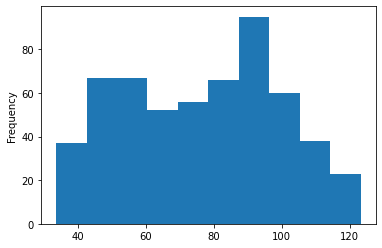

In [70]:
ts.plot.hist()

In [76]:
ets_model = ExponentialSmoothing(ts, trend='mul', seasonal='mul', seasonal_periods=24).fit(smoothing_level=0.1, smoothing_slope=0.1, smoothing_seasonal=0.1)

/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
<ipython-input-76-3e68ad9a3687>:1: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  ets_model = ExponentialSmoothing(ts, trend='mul', seasonal='mul', seasonal_periods=24).fit(smoothing_level=0.1, smoothing_slope=0.1, smoothing_seasonal=0.1)


In [77]:
print(ets_model.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:              electricity   No. Observations:                  561
Model:             ExponentialSmoothing   SSE                           3341.712
Optimized:                         True   AIC                           1057.114
Trend:                   Multiplicative   BIC                           1178.347
Seasonal:                Multiplicative   AICC                          1060.624
Seasonal Periods:                    24   Date:                 Thu, 09 Sep 2021
Box-Cox:                          False   Time:                         17:46:32
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.1000000                alpha                False
smoothing_trend          

In [84]:
ets_model.forecast(24)

2019-10-01     95.688294
2019-11-01     94.629362
2019-12-01    103.873875
2020-01-01    109.085503
2020-02-01    102.562443
2020-03-01     98.426235
2020-04-01     92.485256
2020-05-01     96.624999
2020-06-01    109.682734
2020-07-01    120.602995
2020-08-01    121.255796
2020-09-01    109.462211
2020-10-01     98.437431
2020-11-01     96.744545
2020-12-01    106.370608
2021-01-01    112.575117
2021-02-01    105.350193
2021-03-01    100.307843
2021-04-01     94.968610
2021-05-01    100.621543
2021-06-01    114.125844
2021-07-01    124.557302
2021-08-01    124.296040
2021-09-01    112.096917
Freq: MS, dtype: float64

In [86]:
ts

date
1973-01-01     35.9728
1973-02-01     36.1334
1973-03-01     35.0625
1973-04-01     33.8416
1973-05-01     33.5107
                ...   
2019-05-01     97.5860
2019-06-01    110.8580
2019-07-01    122.1014
2019-08-01    121.7765
2019-09-01    109.7190
Name: electricity, Length: 561, dtype: float64

In [85]:
# Doing train and test split

In [100]:
train = ts['1973-01-01':'2017-09-01']  # Model on the train data

In [98]:
test = ts['2017-08-01':]

In [101]:
ets_model = ExponentialSmoothing(train, trend='mul', seasonal='mul', seasonal_periods=12).fit(smoothing_level=0.1, smoothing_slope=0.1, smoothing_seasonal=0.1)

/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
<ipython-input-101-27c6e3beb754>:1: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  ets_model = ExponentialSmoothing(train, trend='mul', seasonal='mul', seasonal_periods=12).fit(smoothing_level=0.1, smoothing_slope=0.1, smoothing_seasonal=0.1)


In [ ]:
# Forecasting for 24 months 

In [102]:
f_cast = ets_model.forecast(24)

In [103]:
f_cast

2017-10-01     93.875262
2017-11-01     92.426230
2017-12-01    101.567301
2018-01-01    107.065028
2018-02-01    100.691201
2018-03-01     95.416633
2018-04-01     89.675513
2018-05-01     94.662064
2018-06-01    108.052572
2018-07-01    118.226569
2018-08-01    118.093163
2018-09-01    105.656761
2018-10-01     94.314525
2018-11-01     92.858713
2018-12-01    102.042557
2019-01-01    107.566010
2019-02-01    101.162358
2019-03-01     95.863109
2019-04-01     90.095125
2019-05-01     95.105009
2019-06-01    108.558174
2019-07-01    118.779778
2019-08-01    118.645748
2019-09-01    106.151152
Freq: MS, dtype: float64

In [99]:
test

date
2017-10-01     93.4264
2017-11-01     89.9026
2017-12-01    101.8836
2018-01-01    102.9398
2018-02-01     92.0095
2018-03-01     93.3526
2018-04-01     86.8386
2018-05-01     93.2361
2018-06-01    107.1009
2018-07-01    119.2874
2018-08-01    115.7108
2018-09-01    103.4070
2018-10-01     94.6492
2018-11-01     91.9079
2018-12-01    101.9883
2019-01-01    111.8520
2019-02-01     97.3261
2019-03-01     93.8406
2019-04-01     89.1873
2019-05-01     97.5860
2019-06-01    110.8580
2019-07-01    122.1014
2019-08-01    121.7765
2019-09-01    109.7190
Name: electricity, dtype: float64

In [104]:
print('test error', np.mean(np.abs(test - f_cast)/test))

test error 0.023170306865490015


In [ ]:
# since this model is giving low error we can forecast using this model 

In [106]:
ets_model_ts = ExponentialSmoothing(ts, trend='mul', seasonal='mul', seasonal_periods=24).fit(smoothing_level=0.1, smoothing_slope=0.1, smoothing_seasonal=0.1)

/Users/abin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
<ipython-input-106-9eeca9311ea1>:1: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  ets_model_ts = ExponentialSmoothing(ts, trend='mul', seasonal='mul', seasonal_periods=24).fit(smoothing_level=0.1, smoothing_slope=0.1, smoothing_seasonal=0.1)


In [107]:
ets_model_ts.forecast(24)

2019-10-01     95.688294
2019-11-01     94.629362
2019-12-01    103.873875
2020-01-01    109.085503
2020-02-01    102.562443
2020-03-01     98.426235
2020-04-01     92.485256
2020-05-01     96.624999
2020-06-01    109.682734
2020-07-01    120.602995
2020-08-01    121.255796
2020-09-01    109.462211
2020-10-01     98.437431
2020-11-01     96.744545
2020-12-01    106.370608
2021-01-01    112.575117
2021-02-01    105.350193
2021-03-01    100.307843
2021-04-01     94.968610
2021-05-01    100.621543
2021-06-01    114.125844
2021-07-01    124.557302
2021-08-01    124.296040
2021-09-01    112.096917
Freq: MS, dtype: float64

# ARIMA

In [135]:
ts_ln = np.log(ts)

adfuller(ts_ln) #p-value=3.301343802151652e-12, since p-value is low, the series(ts_diff) is stationary

(-3.0018666788915676,
 0.03472044330065583,
 15,
 545,
 {'1%': -3.442405720052601,
  '5%': -2.866857804790472,
  '10%': -2.5696022094099824},
 -2515.663511859698)

In [ ]:
# original = ts
# stationary series = ts_ln
# input for ARIMA: Yt = ts, d=1

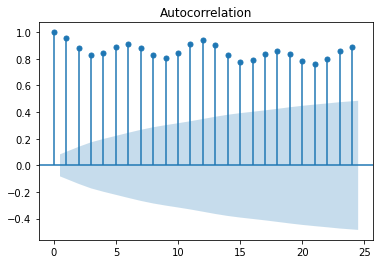

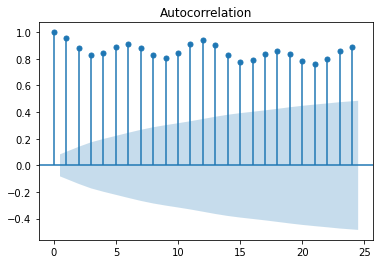

In [137]:
smt.graphics.plot_acf(ts, lags=24) # q=0

there is no seasonality present

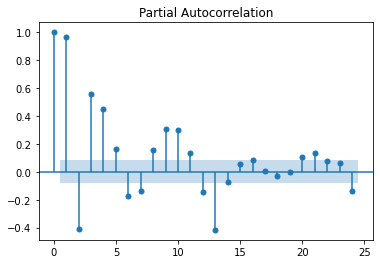

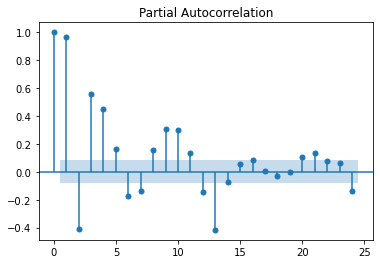

In [138]:
smt.graphics.plot_pacf(ts_ln, lags=24) # p = 1

In [125]:
import sys
import itertools
import warnings

def auto_arima(timeseries, regressors=None, p=range(0, 2), d=range(0, 2), q=range(0, 2),
              P=range(0, 2), D=range(0, 1), Q=range(0, 2)):

    # Generate all different combinations of p, d and q triplets
    pdq = list(itertools.product(p, d, q))

    # Generate all different combinations of seasonal p, q and q triplets
    seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(P, D, Q))]
    
    warnings.filterwarnings("ignore") # specify to ignore warning messages

    best_aic = np.inf
    best_pdq = None
    best_seasonal_pdq = None
    best_results = None
    
    for param in pdq:
        for param_seasonal in seasonal_pdq:

            try:
                temp_model = sm.tsa.statespace.SARIMAX(endog=timeseries,
                                                 exog=regressors,
                                                 order = param,
                                                 seasonal_order = param_seasonal,
                                                 enforce_stationarity=False,
                                                 enforce_invertibility=False)
                temp_results = temp_model.fit()

                print("SARIMAX{}x{}12 - AIC:{}".format(param, param_seasonal, temp_results.aic))
                
                if temp_results.aic < best_aic:
                    best_aic = temp_results.aic
                    best_pdq = param
                    best_seasonal_pdq = param_seasonal
                    best_results = temp_results
                
            except:
                #print("Unexpected error:", sys.exc_info()[0])
                continue
    print("Best SARIMAX{}x{}12 model - AIC:{}".format(best_pdq, best_seasonal_pdq, best_aic))
    print(best_results.summary().tables[0])
    print(best_results.summary().tables[1])
    #return best_results

In [ ]:
best_results = auto_arima(ts,  p=range(0, 3), d=range(2, 3), q=range(0, 3),
                         P=range(0, 3), D=range(0, 2), Q=range(0, 3))    #Number of models = 3*1*3*3*2*3 = 162

In [164]:
ts

date
1973-01-01     35.9728
1973-02-01     36.1334
1973-03-01     35.0625
1973-04-01     33.8416
1973-05-01     33.5107
                ...   
2019-05-01     97.5860
2019-06-01    110.8580
2019-07-01    122.1014
2019-08-01    121.7765
2019-09-01    109.7190
Name: electricity, Length: 561, dtype: float64

In [152]:
ln_ts = np.log(ts)

In [165]:
train = ln_ts[:'2017-07-01']
test = ln_ts['2017-08-01':]

In [203]:
import statsmodels.api as sm

model = sm.tsa.statespace.SARIMAX(ln_ts
                                             , order = (1,2,1), seasonal_order= (1,0,1,12),
                                             enforce_stationarity=False,
                                             enforce_invertibility=False).fit()

In [204]:
f_cast = np.exp(model.forecast(24))

In [168]:
act = np.exp(test)

In [169]:
print('test_error:',np.mean(np.abs(act-f_cast)/act))

test_error: 0.24715663186215842


In [180]:
pred = np.exp(model.fittedvalues)['2017-08-01':]
act = np.exp(ln_ts)['2017-08-01':]

In [181]:
print('train_error_last1year:', np.mean(np.abs(act-pred)/act))

train_error_last1year: 0.07393052257030373


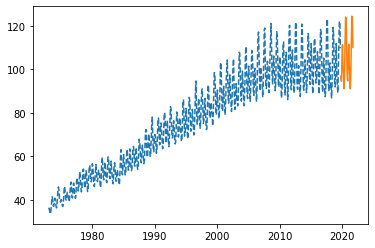

In [205]:
import matplotlib.pyplot as plt
plt.plot(ts, '--', label='obs')
plt.plot(f_cast, '-', label=f_cast)

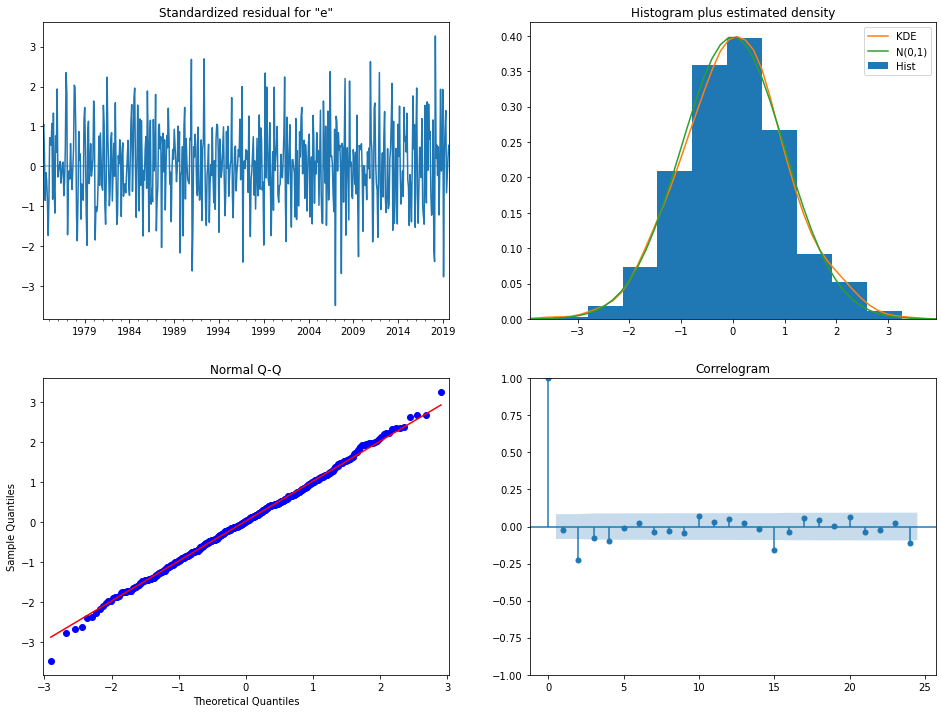

In [202]:
model.plot_diagnostics(lags=24, figsize=(16,12))
plt.show()

#Errors should follow normal distribution
#ACF of Errors - Error series should be white noise/random walk- There is no auto correlation among errors